Implementation of Different Types of Gradient Descent Functions from Scracth

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


Data Preprocessing

In [366]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()
x_scaled = sx.fit_transform(df.drop('price',axis=1))
y_scaled = sy.fit_transform(df[['price']])
# Data Preprocessing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled,test_size=0.15,random_state=42)

Batch Gradient Descent

In [552]:
class BatchGD:
    def __init__(self):
        self.features = None
        self.b = 0
        self.learning_rate = 0.01
        
    def print_learning_behavior(self, cost_list, epoch_list):
        plt.style.use('dark_background')
        plt.plot(epoch_list, cost_list)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.title("Learning Behavior")
        
    def fit(self, x, y, epochs=100):
        self.features, self.b, cost_list, epoch_list = self.gradient_descent(x, y, epochs, self.learning_rate)
        self.print_learning_behavior(cost_list, epoch_list)
        return self.features[0], self.b.item()
    
    def predict(self, x_test, y_test):
        y_pred = np.dot(x_test, self.features.T) + self.b
        mse = np.mean((y_test - y_pred) ** 2)
        print(f"Mean Squared Error on Batch GD Test Set: {mse}")
        return y_pred
    
    def get_price(self, area, bedrooms):
        x_df = pd.DataFrame([[area, bedrooms]], columns=df.drop('price', axis=1).columns)
        x = sx.transform(x_df)
        price = np.dot(x, self.features.T) + self.b
        price = sy.inverse_transform(price)
        return price[0][0].item()
        
    def gradient_descent(self, features, y_true, epochs, learning_rate):
        w = np.ones(shape=features.shape[1]).reshape(1, -1)
        b = np.float64(0)
        cost_list = []
        epoch_list = []
        n = len(y_true)
        for i in range(epochs):
            y_pred = np.dot(features, w.T) + b
            w_grad = -(2 / n) * np.dot(features.T, (y_true - y_pred))
            b_grad = -(2 / n) * np.sum(y_true - y_pred)
            w = w - learning_rate * w_grad.T
            b = b - learning_rate * b_grad
            
            if i%10 == 0:
                cost = np.mean((y_true - y_pred) ** 2)
                cost_list.append(cost)
                epoch_list.append(i)
        return w, b, cost_list, epoch_list

(array([0.69771257, 0.66788399]), -0.22319162695043895)

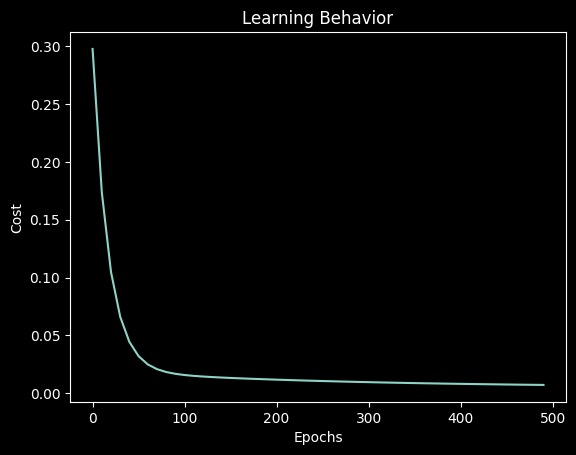

In [380]:
BatchGD_model = BatchGD()
BatchGD_model.fit(x_train, y_train, epochs=500)

In [381]:
r1 = BatchGD_model.predict(x_test, y_test)
r2 = BatchGD_model.get_price(1310, 3)
r1, r2

Mean Squared Error on Test Set: 0.00347918220230169


(array([[0.00537055],
        [0.28878737],
        [0.03400082]]),
 63.51595836078129)

Stochastic Gradient Descent

In [553]:
class StocGD:
    def __init__(self):
        self.features = None
        self.b = 0
        self.learning_rate = 0.01
        
    def print_learning_behavior(self, cost_list, epoch_list):
        plt.style.use('dark_background')
        plt.plot(epoch_list, cost_list)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.title("Learning Behavior")
        
    def fit(self, x, y, epochs=100):
        self.features, self.b, cost_list, epoch_list = self.gradient_descent(x, y, epochs, self.learning_rate)
        self.print_learning_behavior(cost_list, epoch_list)
        return self.features[0], self.b.item()
    
    def predict(self, x_test, y_test):
        y_pred = np.dot(x_test, self.features.T) + self.b
        mse = np.mean((y_test - y_pred) ** 2)
        print(f"Mean Squared Error on Stochastic GD Test Set: {mse}")
        return y_pred
    
    def get_price(self, area, bedrooms):
        x_df = pd.DataFrame([[area, bedrooms]], columns=df.drop('price', axis=1).columns)
        x = sx.transform(x_df)
        price = np.dot(x, self.features.T) + self.b
        price = sy.inverse_transform(price)
        return price[0][0].item()
        
    def gradient_descent(self, features, y_true, epochs, learning_rate):
        w = np.ones(shape=features.shape[1]).reshape(1, -1)
        b = np.float64(0)
        cost_list = []
        epoch_list = []
        n = len(y_true)
        for i in range(epochs):
            random_index = np.random.randint(0, n - 1)
            sample_x = features[random_index].reshape(1, -1)
            sample_y = y_true[random_index].reshape(1, -1)
            y_pred = np.dot(sample_x, w.T) + b
            w_grad = -2 * np.dot(sample_x.T, (sample_y - y_pred))
            b_grad = -2 * np.sum(sample_y - y_pred)
            w = w - learning_rate * w_grad.T
            b = b - learning_rate * b_grad
            
            if i%200 == 0:
                cost = np.mean((sample_y - y_pred) ** 2)
                cost_list.append(cost)
                epoch_list.append(i)
        return w, b, cost_list, epoch_list

(array([0.83339705, 0.27225058]), -0.07750473603783496)

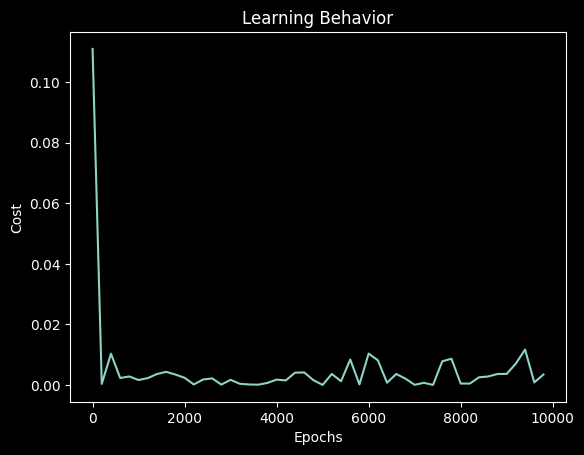

In [518]:
StocGD_model = StocGD()
StocGD_model.fit(x_train, y_train, epochs=10000)

In [521]:
r1 = StocGD_model.predict(x_test, y_test)
r2 = StocGD_model.get_price(1310, 3)
r1, r2

Mean Squared Error on Test Set: 0.001602026469119693


(array([[0.06412675],
        [0.27128049],
        [0.09832477]]),
 59.69977014411116)

Mini Batch Gradient Descent

In [554]:
class MiniBatchGD:
    def __init__(self):
        self.features = None
        self.b = 0
        self.learning_rate = 0.01
        self.batch_size = 5
        
    def print_learning_behavior(self, cost_list, epoch_list):
        plt.style.use('dark_background')
        plt.plot(epoch_list, cost_list)
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.title("Learning Behavior")
        
    def fit(self, x, y, epochs=100):
        self.features, self.b, cost_list, epoch_list = self.gradient_descent(x, y, epochs, self.learning_rate, self.batch_size)
        self.print_learning_behavior(cost_list, epoch_list)
        return self.features[0], self.b.item()
    
    def predict(self, x_test, y_test):
        y_pred = np.dot(x_test, self.features.T) + self.b
        mse = np.mean((y_test - y_pred) ** 2)
        print(f"Mean Squared Error on Mini Batch GD Test Set: {mse}")
        return y_pred
    
    def get_price(self, area, bedrooms):
        x_df = pd.DataFrame([[area, bedrooms]], columns=df.drop('price', axis=1).columns)
        x = sx.transform(x_df)
        price = np.dot(x, self.features.T) + self.b
        price = sy.inverse_transform(price)
        return price[0][0].item()
        
    def gradient_descent(self, features, y_true, epochs, learning_rate, batch_size):
        w = np.ones(shape=features.shape[1]).reshape(1, -1)
        b = np.float64(0)
        cost_list = []
        epoch_list = []
        n = len(y_true)
        for i in range(epochs):
            random_index = np.random.permutation(n)
            random_x = features[random_index]
            random_y = y_true[random_index]
            for j in range(0, n, batch_size):
                sample_x = random_x[j:j+batch_size]
                sample_y = random_y[j:j+batch_size]
                y_pred = np.dot(sample_x, w.T) + b
                w_grad = -(2 / len(sample_x)) * np.dot(sample_x.T, (sample_y - y_pred))
                b_grad = -(2 / len(sample_x)) * np.sum(sample_y - y_pred)
                w = w - learning_rate * w_grad.T
                b = b - learning_rate * b_grad
            
                if i%20 == 0:
                    cost = np.mean((sample_y - y_pred) ** 2)
                    cost_list.append(cost)
                    epoch_list.append(i)
        return w, b, cost_list, epoch_list

(array([0.66623051, 0.52723746]), -0.13411666609812944)

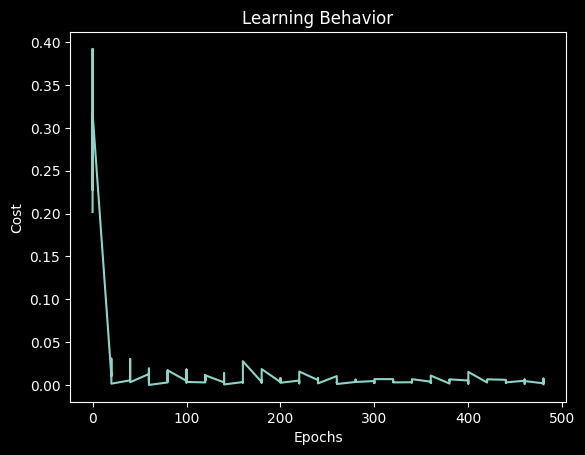

In [532]:
MiniBatch_Model = MiniBatchGD()
MiniBatch_Model.fit(x_train, y_train, epochs=500)

In [536]:
r1 = MiniBatch_Model.predict(x_test, y_test)
r2 = MiniBatch_Model.get_price(1310, 3)
r1, r2

Mean Squared Error on Test Set: 0.0028648755960599074


(array([[0.05650477],
        [0.29950571],
        [0.0838432 ]]),
 65.30000996948154)

Combine Result Comparison between Different GD Methods

In [606]:
class CombineGD:
    def __init__(self):
        self.m1 = BatchGD()
        self.m2 = StocGD()
        self.m3 = MiniBatchGD()
    
    def generate_comparison_table(self, y_pred1, y_pred2, y_pred3, y_true):
        comparison_df = pd.DataFrame({
            'True Values': y_true.flatten(),
            'Batch GD Predictions': y_pred1.flatten(),
            'Stochastic GD Predictions': y_pred2.flatten(),
            'Mini-Batch GD Predictions': y_pred3.flatten()
        })
        
        fig, ax = plt.subplots(figsize=(8, 2))
        ax.axis('tight')
        ax.axis('off')
        table = ax.table(
            cellText=comparison_df.values, 
            colLabels=comparison_df.columns, 
            cellLoc='left', 
            loc='center'
        )
        for cell in table._cells.values():
            cell.set_facecolor('black')
            cell.set_text_props(color='white')
            cell.set_edgecolor('white')  # Add white border
            cell.set_linewidth(1)

        table.scale(1.2, 1.2)
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        plt.title("Comparison of Predictions from Different Gradient Descent Methods")
        
        
    def fit(self, x, y, epochs=1000):
        self.m1.fit(x, y, epochs)
        self.m2.fit(x, y, epochs)
        self.m3.fit(x, y, epochs)
        
    def predict(self, x, y):
        y_pred1 = self.m1.predict(x, y)
        y_pred2 = self.m2.predict(x, y)
        y_pred3 = self.m3.predict(x, y)
        self.generate_comparison_table(y_pred1, y_pred2, y_pred3, y)

Mean Squared Error on Batch GD Test Set: 0.002864749400123231
Mean Squared Error on Stochastic GD Test Set: 0.00243512353500847
Mean Squared Error on Mini Batch GD Test Set: 0.0024914584927035618


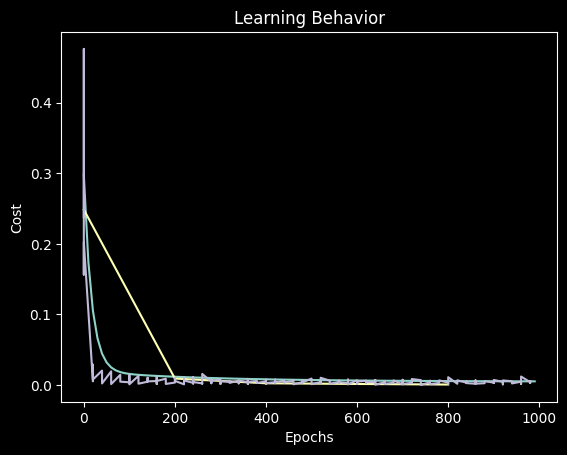

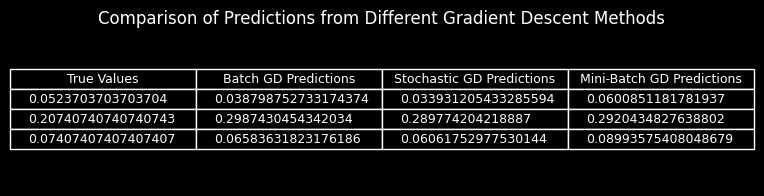

In [607]:
combine_model = CombineGD()
combine_model.fit(x_train, y_train, epochs=1000)
combine_model.predict(x_test, y_test)